In [67]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools import add_constant

In [68]:
ff5_month = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start='1963-07', end='2023-03')[0]
ff5_month = ff5_month
mom_month = pdr.get_data_famafrench('F-F_Momentum_Factor', start='1927-01', end='2023-03')[0]
mom_month = mom_month

ff5_month = ff5_month.reset_index()
mom_month = mom_month.reset_index()
ff5mom_month = ff5_month.merge(mom_month, on='Date', how='left')
ff5mom_month = ff5mom_month.set_index('Date')

/var/folders/sg/4dp480wd1cjd288xvby34rpr0000gn/T/ipykernel_30017/1568211615.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff5_month = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start='1963-07', end='2023-03')[0]
/var/folders/sg/4dp480wd1cjd288xvby34rpr0000gn/T/ipykernel_30017/1568211615.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff5_month = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3', start='1963-07', end='2023-03')[0]
/var/folders/sg/4dp480wd1cjd288xvby34rpr0000gn/T/ipykernel_30017/1568211615.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read y

In [69]:
ff5_daily = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily', start='1963-07-01', end='2023-03-31')[0]
ff5_daily = ff5_daily
mom_daily = pdr.get_data_famafrench('F-F_Momentum_Factor_daily', start='1926-11-03', end='2023-03-31')[0]
mom_daily = mom_daily

ff5_daily = ff5_daily.reset_index()
mom_daily = mom_daily.reset_index()
ff5mom_daily = ff5_daily.merge(mom_daily, on='Date', how='left')
ff5mom_daily = ff5mom_daily.set_index('Date')

/var/folders/sg/4dp480wd1cjd288xvby34rpr0000gn/T/ipykernel_30017/3591460299.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff5_daily = pdr.get_data_famafrench('F-F_Research_Data_5_Factors_2x3_daily', start='1963-07-01', end='2023-03-31')[0]
/var/folders/sg/4dp480wd1cjd288xvby34rpr0000gn/T/ipykernel_30017/3591460299.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mom_daily = pdr.get_data_famafrench('F-F_Momentum_Factor_daily', start='1926-11-03', end='2023-03-31')[0]


In [70]:
ff5mom_month.dropna(inplace=True)

In [71]:
ff5mom_month

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1963-07,-0.39,-0.41,-0.97,0.68,-1.18,0.27,0.90
1963-08,5.07,-0.80,1.80,0.36,-0.35,0.25,1.01
1963-09,-1.57,-0.52,0.13,-0.71,0.29,0.27,0.19
1963-10,2.53,-1.39,-0.10,2.80,-2.01,0.29,3.12
1963-11,-0.85,-0.88,1.75,-0.51,2.24,0.27,-0.74
...,...,...,...,...,...,...,...
2022-11,4.60,-2.67,1.38,6.01,3.11,0.29,-2.01
2022-12,-6.41,-0.16,1.32,0.09,4.19,0.33,4.52
2023-01,6.65,4.43,-4.05,-2.62,-4.53,0.35,-15.98


In [83]:
# calculate rolling variance
rolling_variance_daily = ff5mom_daily.rolling(22, min_periods=22).var()
rolling_variance = rolling_variance_daily.resample('M').last().drop(columns=['RF'])

In [85]:
rolling_variance = rolling_variance ** -1

In [89]:
rolling_variance = rolling_variance.reset_index()

In [92]:
rolling_variance

,Date,Mkt-RF,SMB,HML,RMW,CMA,Mom
0,1963-07-31,4.469762,47.760330,26.396983,45.127324,31.593416,12.978512
1,1963-08-31,11.500977,29.715197,25.290679,75.218573,43.235757,20.963409
2,1963-09-30,6.484129,19.019860,28.526971,34.794397,35.608309,13.757862
3,1963-10-31,5.835389,12.909608,8.586850,16.207967,11.664752,10.592710
4,1963-11-30,0.669356,4.814682,12.504567,10.765115,12.213660,1.562705
...,...,...,...,...,...,...,...
712,2022-11-30,0.314242,4.052429,0.814639,1.621913,1.123394,0.196801
713,2022-12-31,0.545313,5.844314,1.208067,2.663494,2.285861,0.578830
714,2023-01-31,0.855394,4.766012,2.212627,3.374825,2.648352,0.673593
715,2023-02-28,0.895622,2.863532,1.117726,3.761771,1.721952,0.368082


In [188]:
row_sums = rolling_variance.iloc[:, 1:].sum(axis=1)

# Divide each entry by the sum of other entries in the row
weighted_df = rolling_variance.iloc[:, 1:].div(row_sums, axis=0)

# Concatenate the 'Date' column with the weighted DataFrame
weights = pd.concat([rolling_variance['Date'], weighted_df], axis=1)
weights.index = weights.Date
weights = weights.drop(columns='Date')
weights = weights.shift(1)

In [189]:
weights = weights.reset_index()

In [190]:
weights['Date'] = weights['Date'].dt.strftime('%Y-%m')

In [191]:
weights = weights.dropna()

In [192]:
weights.index = weights.Date
weights = weights.drop(columns=['Date'])

In [193]:
weights

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
1963-08,0.026554,0.283737,0.156820,0.268094,0.187691,0.077103
1963-09,0.055850,0.144301,0.122815,0.365272,0.209959,0.101801
1963-10,0.046921,0.137634,0.206431,0.251784,0.257674,0.099556
1963-11,0.088687,0.196203,0.130505,0.246332,0.177283,0.160990
1963-12,0.015738,0.113206,0.294017,0.253118,0.287177,0.036744
...,...,...,...,...,...,...
2022-11,0.031721,0.378612,0.147422,0.167967,0.210137,0.064141
2022-12,0.038683,0.498858,0.100283,0.199659,0.138291,0.024226
2023-01,0.041545,0.445251,0.092037,0.202919,0.174149,0.044098


In [194]:
factor_returns = ff5mom_month[1:]

In [195]:
weights.index = factor_returns.index

In [196]:
excess_returns = (weights * ff5mom_month[['Mkt-RF','SMB','HML','RMW','CMA','Mom   ']]).sum(axis=1)

In [200]:
def estimate_models(excess_returns, ff5):
    # CAPM Model
    X = add_constant(ff5[['Mkt-RF']].loc[excess_returns.index])
    capm_model = OLS(excess_returns, X).fit()

    # FF3 Model
    X = add_constant(ff5[['Mkt-RF', 'SMB', 'HML']].loc[excess_returns.index])
    ff3_model = OLS(excess_returns, X).fit()

    # Carhart Model
    X = add_constant(ff5[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].loc[excess_returns.index])
    carhart_model = OLS(excess_returns, X).fit()

    print(ff5.columns)
    # FF5 Model
    X = add_constant(ff5[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom   ']].loc[excess_returns.index,:])
    ff5_model = OLS(excess_returns, X).fit()

    return capm_model, ff3_model, carhart_model, ff5_model

factor_returns = ff5mom_month[['Mkt-RF','SMB','HML','RMW','CMA','Mom   ']]
capm_model, ff3_model, carhart_model, ff5_model = estimate_models(excess_returns, factor_returns)

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mom   '], dtype='object')


In [201]:
print(capm_model.summary())
print(ff3_model.summary())
print(carhart_model.summary())
print(ff5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.909
Date:                Tue, 16 May 2023   Prob (F-statistic):             0.0484
Time:                        20:49:56   Log-Likelihood:                -1038.9
No. Observations:                 717   AIC:                             2082.
Df Residuals:                     715   BIC:                             2091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3390      0.039      8.730      0.0

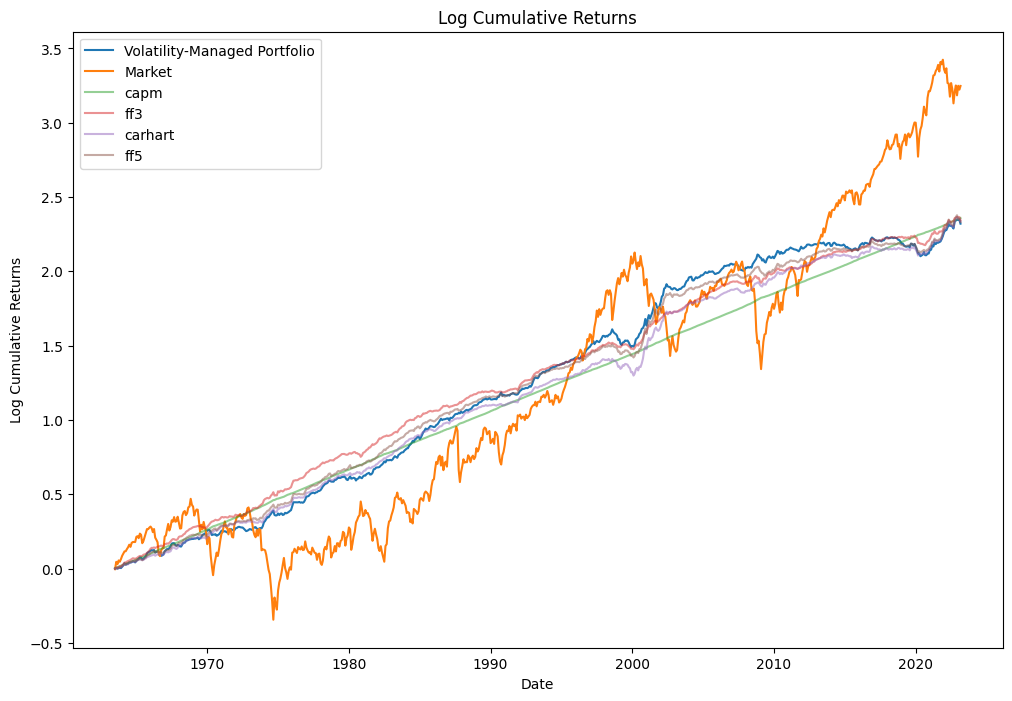

In [206]:
import matplotlib.pyplot as plt
def get_rets(series):
    return np.log(((1 + series/100).cumprod()))
# calculate log cumulative returns
portfolio_cum_returns = get_rets(excess_returns)
market_cum_returns = get_rets(factor_returns['Mkt-RF'])
capm_cum_returns = get_rets(capm_model.predict())
ff3_cum_returns = get_rets(ff3_model.predict())
carhart_cum_returns = get_rets(carhart_model.predict())
ff5_cum_returns = get_rets(ff5_model.predict())

dt_index = excess_returns.index.to_timestamp()

# plot
plt.figure(figsize=(12, 8))
plt.plot(dt_index, list(portfolio_cum_returns), label='Volatility-Managed Portfolio')
plt.plot(dt_index, list(market_cum_returns), label='Market')
plt.plot(dt_index, list(capm_cum_returns), label='capm', alpha=0.5)
plt.plot(dt_index, list(ff3_cum_returns), label='ff3', alpha=0.5)
plt.plot(dt_index, list(carhart_cum_returns), label='carhart', alpha=0.5)
plt.plot(dt_index, list(ff5_cum_returns), label='ff5', alpha=0.5)
plt.xlabel('Date')

plt.ylabel('Log Cumulative Returns')
plt.title('Log Cumulative Returns')
plt.legend()
plt.show()

(b) It seems that the aggregat portfolio outperforms each composite portfolio. Significant alphas.

(c) The volatility-managed portfolio produces alpha because it seeks to reduce risk by adjusting portfolio weights based on the volatility of the underlying assets. By doing this, the portfolio maintains a more stable performance during periods of high market volatility, which in turn leads to better risk-adjusted returns compared to the market. 

However, the cumulative returns suggest that the volatility-managed portfolio does not beat the market since the turn of the century. This can be due to a few reasons:
- Changing market conditions since the turn of the century, especially apparent with the effective flatline around 2008
- During periods of strong market performance, higher-risk assets tend to deliver better returns, resulting in this risk-averse strategy underperforming
- During periods of low volatilty this portfolio is less effective